## 1 Proyección quincuncial: Implementación numérica
### 1.1 Importe de librerías y datos iniciales

In [1]:
from mpmath import *
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import geopandas as gpd

In [2]:
ellipf(np.pi/2, m=0.5)

mpf('1.8540746773013719')

### 1.2. Definición de funciones 

In [15]:
def quincuncial(punto):
    coordenada = encontrar_octante(punto)
    theta = coordenada[0][0]
    p = coordenada[0][1]
    octante = coordenada[1]
    K=1.854074677
    
    x=0.5*ellipf(np.arccos(round((2*(np.tan(p/2)**2)-np.sqrt((1+np.tan(p/2)**4)**2-4*np.tan(p/2)**4*np.cos(2*theta)**2))/(1+(2*np.tan(p/2)**2)*np.cos(2*theta)-np.tan(p/2)**4), 9)), 0.5)
    y=0.5*ellipf(np.arccos(round((1+(2*np.tan(p/2)**2)*np.cos(2*theta)-np.tan(p/2)**4)/(2*(np.tan(p/2)**2)+np.sqrt((1+np.tan(p/2)**4)**2-4*np.tan(p/2)**4*np.cos(2*theta)**2)), 9)), 0.5)

     
    if octante == 1:#cuad 3
        #pass
        return (float(x),-float(y))
    if octante == 2:# cuad 4
        #pass
        return (2*K-float(x),-float(y))
    if octante == 3:# cuad 1
        #pass
        return (float(x),float(y))
    if octante == 4:#cuad 2
        #pass
        return (2*K-float(x),float(y))
    if octante == 5:
        #pass
        return (-float(x),float(y))
    if octante == 6:
        #pass
        return (-float(x),2*K-float(y))
    if octante == 7:
        #pass
        return (float(x),float(y))
    if octante == 8:
        #pass
        return (float(x), 2*K-float(y))

In [4]:
def encontrar_octante(punto):
    
    theta = punto[0]
    p = punto[1]
    octante=40
    
    if p < np.pi/2:
        if theta >= 0 and theta < np.pi/2:
            octante = 1 # cuad 3
            theta=theta-np.pi/2
        if theta > 3*np.pi/2 and theta <= 2*np.pi:
            octante = 2 # cuad 4
            theta=theta+np.pi/2
        if theta >= np.pi/2 and theta < np.pi:
            octante = 3 # cuad 1
            theta=theta-np.pi/2
        if  theta >= np.pi and theta <= 3*np.pi/2:
            octante = 4 # cuad 2
            theta=theta+np.pi/2

    elif p >= np.pi/2:
        if theta >= 0 and theta < np.pi/2:
            octante = 5
            theta=theta-np.pi/2
        if theta > 3*np.pi/2 and theta <= 2*np.pi:
            octante = 6
            theta=theta+np.pi/2
        if theta >= np.pi/2 and theta < np.pi:
            octante = 7
            theta=theta-np.pi/2
        if  theta >= np.pi and theta <= 3*np.pi/2:
            theta=theta+np.pi/2
            octante = 8
    return ((theta, p), octante)

## 2. Proyección quincuncial en meridianos y paralelos
### 2.1 Definición y generación de coordenadas

In [5]:
def generar_meridianos(num_meridianos, num_puntos_por_meridiano):
    coordenadas = []
    angulo_meridiano = 2 * math.pi / num_meridianos
    for meridiano in range(num_meridianos+1):
        theta = angulo_meridiano*meridiano
        for punto in range(num_puntos_por_meridiano+1):
            # Calcular la latitud en radianes
            p = punto*np.pi/num_puntos_por_meridiano
            # Agregar las coordenadas a la lista
            
            if punto == num_puntos_por_meridiano + 1:
                theta = theta - 0.00001
            
            coordenadas.append((theta, p))
            
            
    return coordenadas

def generar_paralelos(num_paralelos, num_puntos_por_paralelo):
    coordenadas = []
    angulo_paralelos = math.pi / num_paralelos
    for paralelo in range(num_paralelos+1):   # Ajuste para incluir el ecuador
        p = paralelo*angulo_paralelos
        for punto in range(num_puntos_por_paralelo+1):
            # Calcular la longitud en radianes
            theta = punto*2*np.pi/num_puntos_por_paralelo
            # Agregar las coordenadas a la lista
            coordenadas.append((theta, p))
    return coordenadas

def graficar_esfera(meridianos, paralelos):
    # Graficar los puntos en una esfera
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for coordenada in meridianos:
        theta = coordenada[0]
        p = coordenada[1]

        x = math.sin(p) * math.cos(theta)
        y = math.sin(p) * math.sin(theta)
        z = math.cos(p)

        ax.scatter(x, y, z, color='b')

    for coordenada in paralelos:
        theta = coordenada[0]
        p = coordenada[1]

        x = math.sin(p) * math.cos(theta)
        y = math.sin(p) * math.sin(theta)
        z = math.cos(p)

        ax.scatter(x, y, z, color='r')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Meridianos y Paralelos Generados')

    plt.show(meridianos, paralelos)   



In [6]:
meridianos = generar_meridianos(37, 500)
paralelos = generar_paralelos(37, 500)

#graficar_esfera(meridianos, paralelos)

### 2.2 Cálculo de la proyección

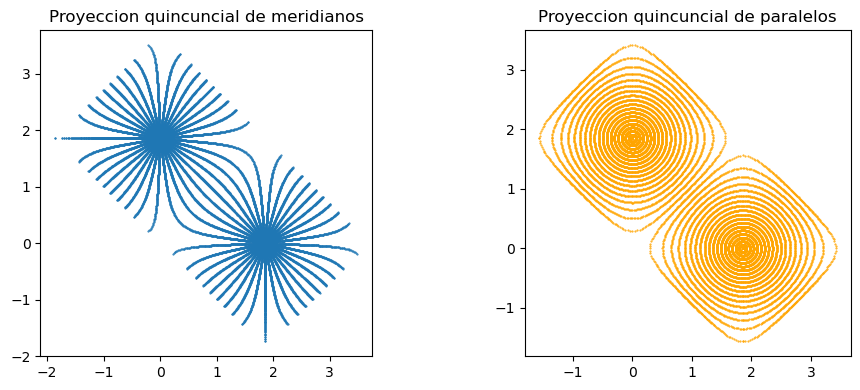

In [7]:
img_meridianos = []
img_paralelos = []

for punto in meridianos:
    img_meridianos.append(quincuncial(punto))
for punto in paralelos:
    img_paralelos.append(quincuncial(punto))
    
# Desempaquetar las coordenadas
x_meridianos, y_meridianos = zip(*img_meridianos)
x_paralelos, y_paralelos = zip(*img_paralelos)

#Crear un cuadro de subgráficos con 1 fila y 2 columnas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Primer gráfico
axes[0].plot(x_meridianos, y_meridianos,  marker='o', linestyle='none', markersize=0.5)
axes[0].set_title("Proyeccion quincuncial de meridianos")
axes[0].set_aspect('equal', adjustable='box')

# Segundo gráfico
axes[1].plot(x_paralelos, y_paralelos,  marker='o', linestyle='none', markersize=0.5, color='orange')
axes[1].set_title("Proyeccion quincuncial de paralelos")
axes[1].set_aspect('equal', adjustable='box')

# Ajustar el diseño
plt.tight_layout()

plt.show()

### 3. Mapamundi: Proyección quincuncial

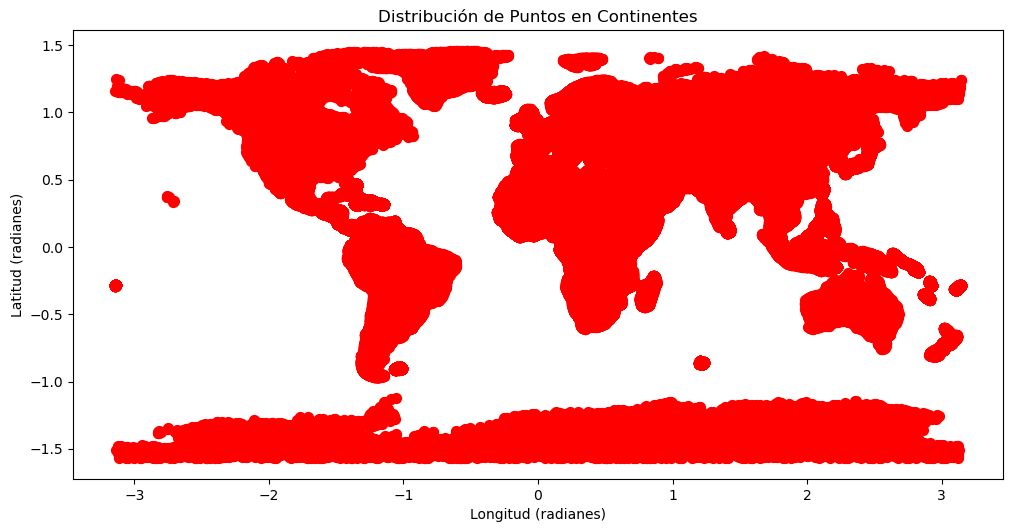

In [26]:
import geopandas as gpd
from shapely.geometry import Point
import random
import math
import matplotlib.pyplot as plt

def distribuir_puntos_en_continentes(mapamundi, num_puntos):
    gdf = gpd.read_file(mapamundi)
    continentes = gdf['geometry']
    coordenadas_puntos = []

    for _ in range(num_puntos):
        continente = random.choice(continentes)
        punto_en_continente = distribuir_punto_en_continente(continente)
        coordenadas_puntos.append(punto_en_continente)

    return coordenadas_puntos

def distribuir_punto_en_continente(continente):
    xmin, ymin, xmax, ymax = continente.bounds
    punto_x = random.uniform(xmin, xmax)
    punto_y = random.uniform(ymin, ymax)
    punto = Point(punto_x, punto_y)

    while not punto.within(continente):
        punto_x = random.uniform(xmin, xmax)
        punto_y = random.uniform(ymin, ymax)
        punto = Point(punto_x, punto_y)

    return math.radians(punto.x), math.radians(punto.y)

def graficar_puntos_sobre_mapa(mapamundi, coordenadas_puntos):
    gdf = gpd.read_file(mapamundi)
    fig, ax = plt.subplots(figsize=(12, 8))

    # Extraer las coordenadas de latitud y longitud de los puntos
    longitudes, latitudes = zip(*coordenadas_puntos)

    # Graficar los puntos sobre el mapa
    ax.scatter(longitudes, latitudes, color='red', marker='o', s=50)

    # Configuración adicional del gráfico
    ax.set_title('Distribución de Puntos en Continentes')
    ax.set_xlabel('Longitud (radianes)')
    ax.set_ylabel('Latitud (radianes)')
    
    # Configurar la escala 1x1
    plt.gca().set_aspect('equal', adjustable='box')

    # Mostrar el gráfico
    plt.show()

# Ejemplo de uso
mapamundi = "data/ne_110m_admin_0_countries.shp"
num_puntos = 1000000
coordenadas_puntos = distribuir_puntos_en_continentes(mapamundi, num_puntos)
graficar_puntos_sobre_mapa(mapamundi, coordenadas_puntos)

In [27]:
#coordenadas_puntos = distribuir_puntos(mapamundi, num_puntos)

map = []
for punto in coordenadas_puntos:
    map.append(quincuncial((punto[0]+np.pi, punto[1]+np.pi/2)))

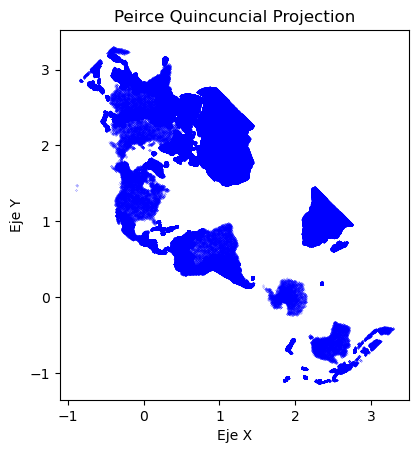

In [32]:
# Filtrar los valores no nulos
filtered_map = [coord for coord in map if coord is not None]

# Desempaquetar las coordenadas
x, y = zip(*filtered_map)

# Graficar líneas en lugar de puntos
plt.plot(x, y, color='blue', marker='o', markersize=0.1, linestyle='none')

# Configurar etiquetas y título
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Peirce Quincuncial Projection')

# Configurar la escala 1x1
plt.gca().set_aspect('equal', adjustable='box')

# Mostrar la gráfica
plt.show()